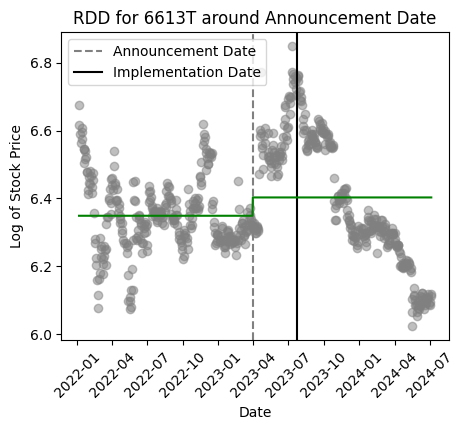

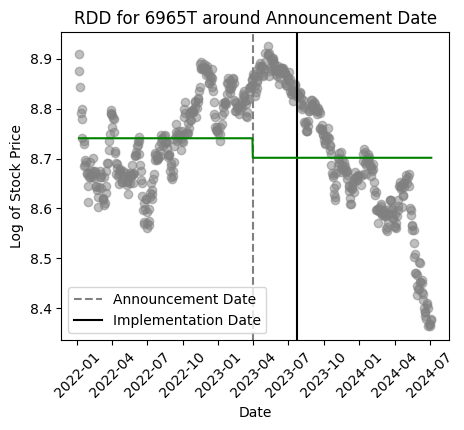

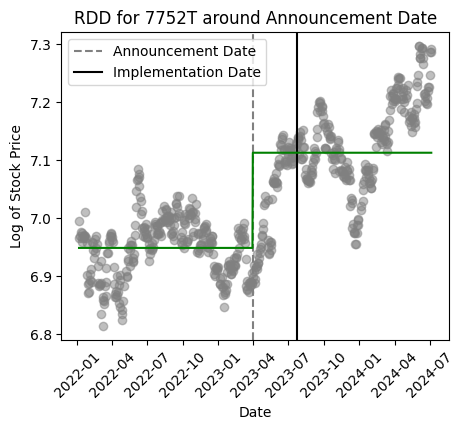

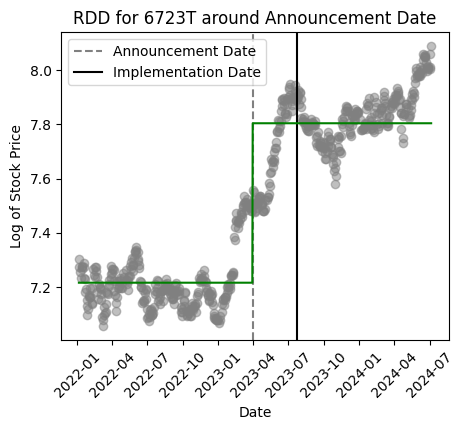

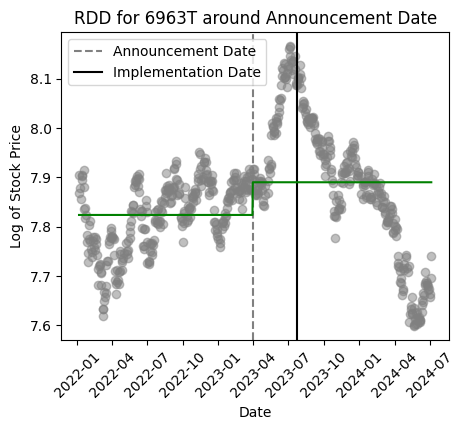

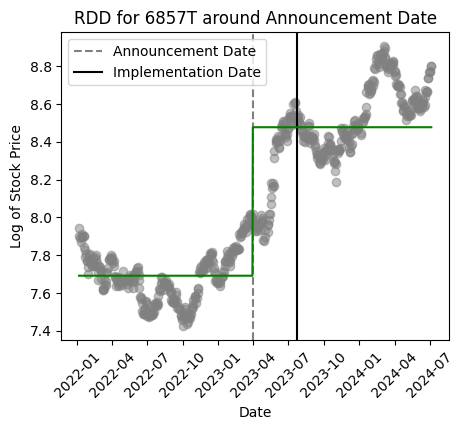

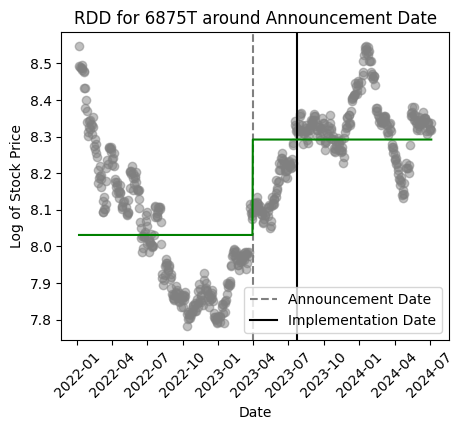

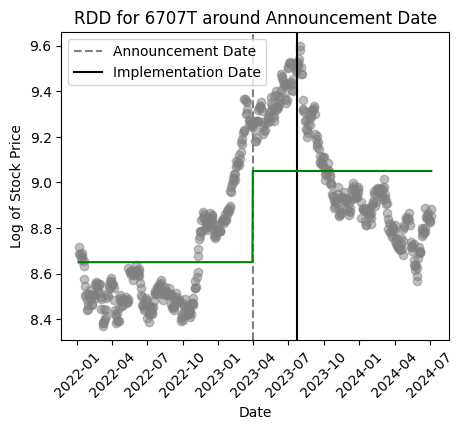

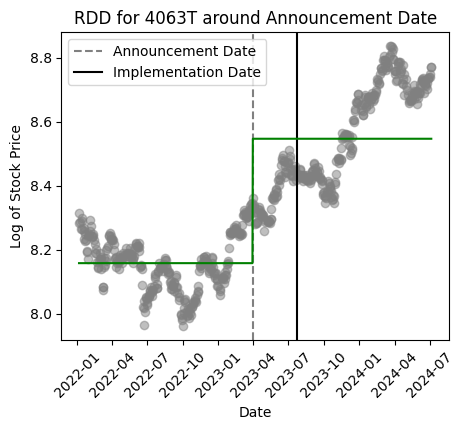

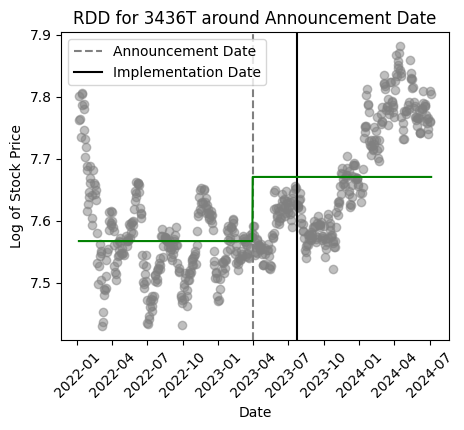

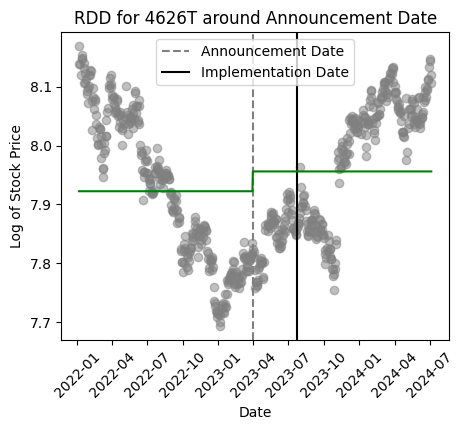

,Stock,Coef,P>|t|,R-squared,F-statistic,Prob (F-statistic)
0,6613T,0.054019,1.480298e-05,0.030266,19.069614,1.480298e-05
1,6965T,-0.039151,2.634893e-05,0.028520,17.937246,2.634893e-05
2,7752T,0.164175,6.158217e-114,0.569564,808.491523,6.158217e-114
3,6723T,0.588758,2.848510e-262,0.859184,3728.000540,2.848510e-262
4,6963T,0.066188,7.703948e-13,0.080680,53.621655,7.703948e-13
5,6857T,0.786417,3.491898e-221,0.808087,2572.738506,3.491898e-221
6,6875T,0.260654,1.639319e-79,0.442282,484.535892,1.639319e-79
7,6707T,0.399766,2.334918e-67,0.388908,388.849497,2.334918e-67
8,4063T,0.388679,4.608119e-158,0.691250,1367.947559,4.608119e-158
9,3436T,0.103406,5.083019e-46,0.282656,240.752834,5.083019e-46


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'stock_semi.csv'
data = pd.read_csv(file_path)

# Convert the date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Take the log of stock prices
for column in data.columns[1:]:
    data[column] = np.log(data[column])

# Remove rows with NaN values
data = data.dropna()

# Define the policy announcement and implementation dates
announcement_date = pd.to_datetime('2023-03-31')
implementation_date = pd.to_datetime('2023-07-23')

# Function to run RDD
def run_rdd(data, stock_column, cutoff):
    # Creating the treatment variable
    data['treatment'] = (data['Date'] >= cutoff).astype(int)

    # Running the RDD
    X = sm.add_constant(data[['treatment']])
    y = data[stock_column]
    rdd_model = sm.OLS(y, X).fit()

    return rdd_model

# Plotting function
def plot_rdd(data, stock_column, announcement_cutoff, implementation_cutoff, model, title):
    plt.figure(figsize=(5, 4))
    plt.scatter(data['Date'], data[stock_column], color='gray', alpha=0.5)
    plt.axvline(x=announcement_cutoff, color='grey', linestyle='--', label='Announcement Date')
    plt.axvline(x=implementation_cutoff, color='black', linestyle='-', label='Implementation Date')
    plt.plot(data['Date'], model.predict(sm.add_constant(data[['treatment']])), color='green')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Log of Stock Price')
    plt.legend()
    plt.xticks(rotation =  45)
    plt.show()

# List of stock columns
stock_columns = ['6613T', '6965T', '7752T', '6723T', '6963T', '6857T', '6875T', '6707T', '4063T', '3436T', '4626T']

# DataFrame to store model summaries
summary_df = pd.DataFrame(columns=['Stock', 'Coef', 'P>|t|', 'R-squared', 'F-statistic', 'Prob (F-statistic)'])

# Running RDD and plotting for each stock column around the announcement date
for stock in stock_columns:
    model = run_rdd(data, stock, announcement_date)

    # Adding model summary to DataFrame
    summary_df = pd.concat([summary_df, pd.DataFrame({
        'Stock': [stock],
        'Coef': [model.params['treatment']],
        'P>|t|': [model.pvalues['treatment']],
        'R-squared': [model.rsquared],
        'F-statistic': [model.fvalue],
        'Prob (F-statistic)': [model.f_pvalue]
    })], ignore_index=True)

    plot_rdd(data, stock, announcement_date, implementation_date, model, f'RDD for {stock} around Announcement Date')

# Displaying the summary DataFrame
display(summary_df)

In [ ]:
# Displaying the summary DataFrame
import ace_tools as tools; tools.display_dataframe_to_user(name="RDD Model Summary", dataframe=summary_df)


ModuleNotFoundError: No module named 'ace_tools'